In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from sklearn.cluster import KMeans

#print(plt.style.available)
plt.style.use('grayscale') # change color scheme for plots

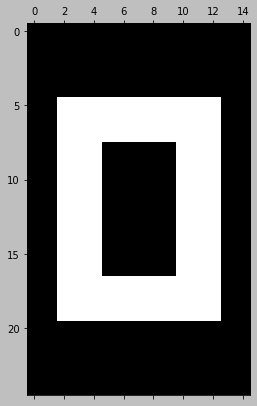

In [2]:
X = np.array([
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
  [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
  [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
  [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
  [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
  [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
  [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
  [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
  [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
  [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
  [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
  [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
  [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
  [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
  [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
plt.matshow(X)

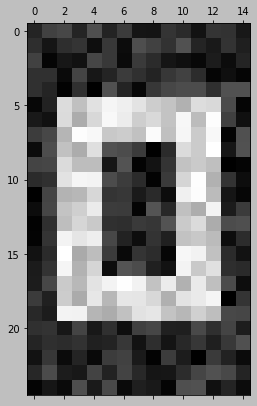

In [3]:
# add Gaussian noise to make things interesting
X = X + 0.5 * np.random.rand(np.shape(X)[0], np.shape(X)[1])
plt.matshow(X)

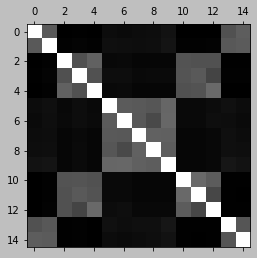

In [4]:
# calculate similarity/adjacency matrix
A = distance_matrix(np.transpose(X), np.transpose(X)) # need transpose coz it compares rows
A = np.exp(-A) / 1 # Gaussian kernel with sigma = 1
plt.matshow(A)

[[2.47001377 0.         0.        ]
 [0.         2.59057371 0.        ]
 [0.         0.         2.98614589]]


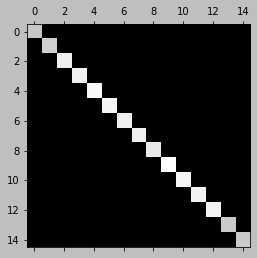

In [5]:
# degree matrix
D = np.diag(A.sum(axis=1))
print(D[0:3,0:3]) # show first three rows, cols
plt.matshow(D)

[[ 1.47001377 -0.36284578 -0.01312953]
 [-0.36284578  1.59057371 -0.02222684]
 [-0.01312953 -0.02222684  1.98614589]]


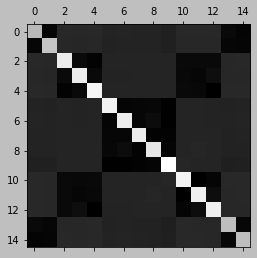

In [6]:
# Laplacian
L = D - A
print(L[0:3,0:3]) # show first three rows, cols
plt.matshow(L)

In [7]:
# calculate eigenvalues and eigenvectors
vals, vecs = np.linalg.eig(L)

# sort these based on the eigenvalues
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]

In [8]:
# each row represents an observation, each column a component
# now we decide which first i columns to keep, so we optimise the graph cut
vecs.shape

(15, 15)

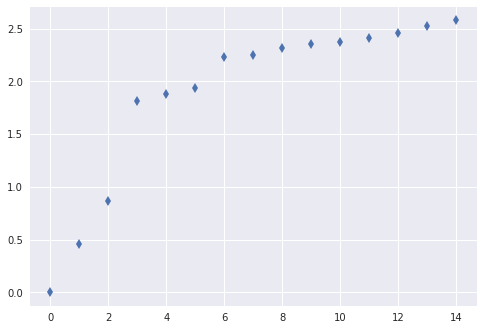

In [9]:
with plt.style.context('seaborn'):
    plt.plot(vals, 'd')

In [10]:
u = np.real(vecs[:,1])
u = u.reshape(-1,1) # numpy magic to turn into a column vector
print(u)

kmeans = KMeans(n_clusters=2)
kmeans.fit(u) 
colors = kmeans.labels_

print("Clusters:", colors)

[[-0.34381529]
 [-0.31088143]
 [ 0.30197774]
 [ 0.27889775]
 [ 0.30177918]
 [-0.08344378]
 [-0.07694664]
 [-0.09762955]
 [-0.09917333]
 [-0.10736103]
 [ 0.30128102]
 [ 0.30186788]
 [ 0.28978919]
 [-0.32282193]
 [-0.33351978]]
Clusters: [0 0 1 1 1 0 0 0 0 0 1 1 1 0 0]


In [11]:
u = np.real(vecs[:,1:3]) # first two components
print(u)

kmeans = KMeans(n_clusters=3)
kmeans.fit(np.real(vecs[:,1:3])) 
colors = kmeans.labels_

print("Clusters:", colors)

[[-0.34381529 -0.29596728]
 [-0.31088143 -0.26203218]
 [ 0.30197774 -0.11721353]
 [ 0.27889775 -0.09833728]
 [ 0.30177918 -0.11426598]
 [-0.08344378  0.34392346]
 [-0.07694664  0.35131699]
 [-0.09762955  0.3710078 ]
 [-0.09917333  0.36665056]
 [-0.10736103  0.33034221]
 [ 0.30128102 -0.11669808]
 [ 0.30186788 -0.11655531]
 [ 0.28978919 -0.1015161 ]
 [-0.32282193 -0.25160565]
 [-0.33351978 -0.28904962]]
Clusters: [2 2 0 0 0 1 1 1 1 1 0 0 0 2 2]
